In [42]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy
from tqdm import tqdm
from random import sample
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances


x,y = make_classification(n_samples=10000, n_features=2, n_informative=2, n_redundant= 0, n_clusters_per_class=1, random_state=60)
X_train, X_test, y_train, y_test = train_test_split(x,y,stratify=y,random_state=42)


In [3]:
X_test

array([[ 1.46955206, -1.430919  ],
       [-0.19754917, -0.29795513],
       [ 0.65395628, -0.49655467],
       ...,
       [-1.98981714, -2.14450451],
       [ 1.43310037, -0.67371889],
       [ 0.72790442, -0.4366136 ]])

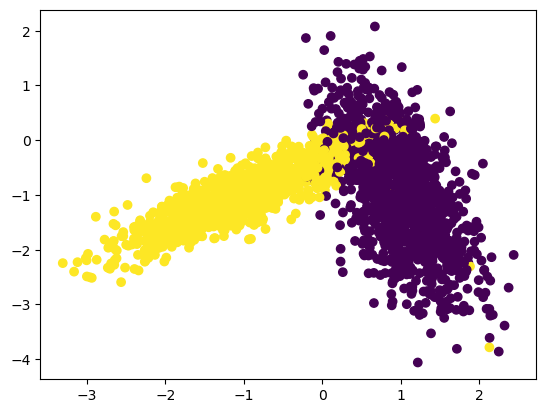

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
# colors = {0:'red', 1:'blue'}
plt.scatter(X_test[:,0], X_test[:,1],c=y_test)
plt.show()

In [113]:
def RandomSearchCV(x_train,y_train,classifier, param_range, folds):
    
    # Initialize the neighbors or Ks"
    neighbors =  sample(range(param_range[0],param_range[1]),10)
    neighbors.sort()
    
    # Stores all accuracy scores for train and test
    trainscores = []
    testscores  = [] 
    
    # Loop through neighbors or ks
    for param in  tqdm(neighbors):
        trainscores_folds = []
        testscores_folds = []
        
        # Loop through the folds
        for fold in range(folds):
             # Perform K folds: dividing the data into groups for training and testing via indices
            elements_in_fold = int(len(x_train) / folds)
            
            test_indices = list(set(list(range((elements_in_fold * fold), (elements_in_fold*(fold+1))))))
            train_indices = list(set(list(range(0, len(x_train)))) - set(test_indices) )

            # Get your train and test sets using the indices
            X_train = x_train[train_indices]
            Y_train = y_train[train_indices]
            X_test = x_train[test_indices]
            Y_test = y_train[test_indices]
            
            # fit the model with a K or param
            classifier.n_neighbors = param
            classifier.fit(X_train, Y_train)
            
            # Make predictions and compute accuracy
            Y_predicted = classifier.predict(X_test)
            testscores_folds.append(accuracy_score(Y_test, Y_predicted))
            
            # append all the accuracies into initialized list on top
            Y_predicted = classifier.predict(X_train)
            trainscores_folds.append(accuracy_score(Y_train, Y_predicted))
        trainscores.append(np.mean(np.array(trainscores_folds)))
        testscores.append(np.mean(np.array(testscores_folds)))
    return trainscores,testscores, neighbors
    

In [114]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import random
import warnings
warnings.filterwarnings("ignore")

 # KNN model classifier
neigh = KNeighborsClassifier()


# define a range of values
params_range = (0,50)

# Init folds
folds = 3

# Tune the parameter using Randomized Search Grid

testscores, trainscores, neighbor = RandomSearchCV(X_train, y_train, neigh, params_range, folds)


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:06<00:00,  1.51it/s]


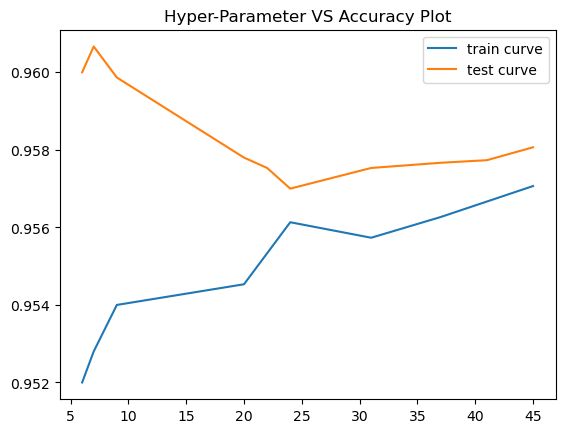

In [119]:
# Plot accuracy vs different k values
plt.plot(neighbor,trainscores, label='train curve')
plt.plot(neighbor,testscores, label='test curve')
plt.title('Hyper-Parameter VS Accuracy Plot')
plt.legend()
plt.show()

In [117]:
# taking it from reference 
def plot_decision_boundary(X1, X2, y, clf):
        # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    x_min, x_max = X1.min() - 1, X1.max() + 1
    y_min, y_max = X2.min() - 1, X2.max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    # Plot also the training points
    plt.scatter(X1, X2, c=y, cmap=cmap_bold)
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("2-Class classification (k = %i)" % (clf.n_neighbors))
    plt.show()



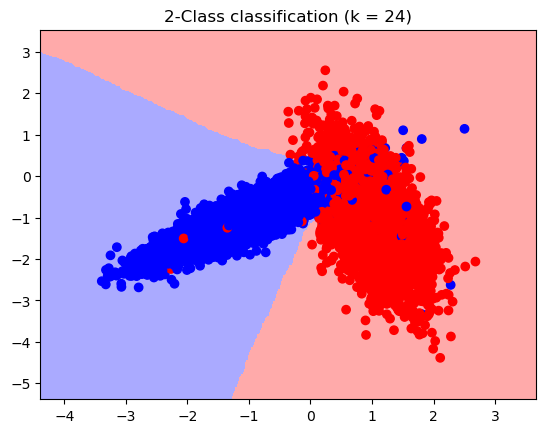

In [118]:
# Build your model with the best K
from matplotlib.colors import ListedColormap
classifier = KNeighborsClassifier( n_neighbors = 24)
classifier.fit(X_train, y_train)
plot_decision_boundary(X_train[:, 0], X_train[:, 1], y_train, classifier)